In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal, chi2

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate synthetic data
data = {
    'Category': np.repeat(['A', 'B', 'C', 'D'], 25),
    'Value': np.hstack([
        np.random.normal(loc=5, scale=1, size=25),
        np.random.normal(loc=5.5, scale=1.2, size=25),
        np.random.normal(loc=6, scale=0.8, size=25),
        np.random.normal(loc=5.8, scale=1.1, size=25)
    ])
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,Category,Value
0,A,5.496714
1,A,4.861736
2,A,5.647689
3,A,6.523030
4,A,4.765847
...,...,...
95,D,4.190134
96,D,6.125732
97,D,6.087161
98,D,5.805625


#### Perform the Kruskal-Wallis Test Manually
- Rank the data: Combine all groups, rank the values, and then split them back into their respective groups.
- Calculate the test statistic.

In [6]:
# Rank the data
df['Rank'] = df['Value'].rank(method='average')

In [7]:
# Calculate the sum of ranks for each group
rank_sums = df.groupby('Category')['Rank'].sum()

In [8]:
# Number of observations per group
n = df.groupby('Category').size()

In [9]:
# Total number of observations
N = len(df)

In [10]:
# Kruskal-Wallis test statistic
H = (12 / (N * (N + 1)) * sum((rank_sums ** 2) / n)) - 3 * (N + 1)
print(f"Kruskal-Wallis H statistic: {H:.4f}")

Kruskal-Wallis H statistic: 23.1402


#### Calculate the p-value
The p-value is calculated based on the chi-square distribution with 
𝑘−1 degrees of freedom, where k is the number of groups.

In [11]:
# Degrees of freedom
df_k = len(rank_sums) - 1

# p-value
p_value = 1 - chi2.cdf(H, df_k)
print(f"P-value: {p_value:.4f}")

P-value: 0.0000


#### Plot the Chi-Square Distribution

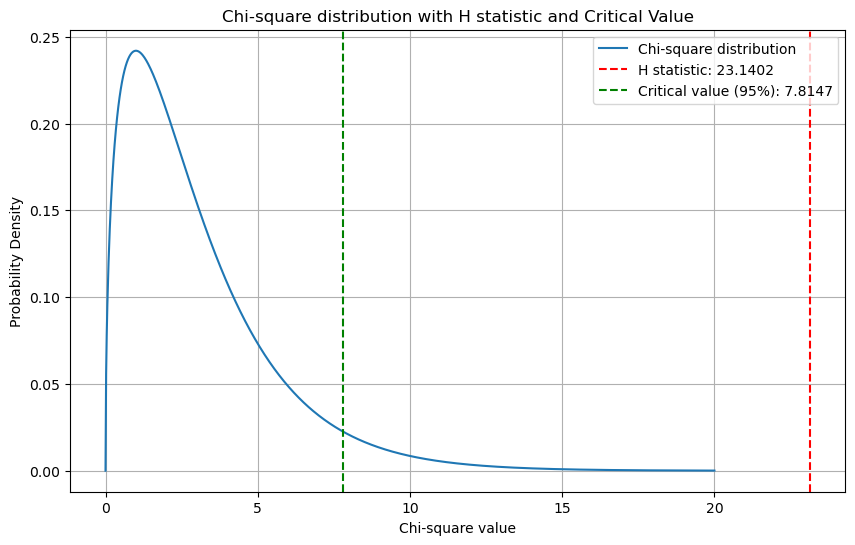

In [12]:
# Critical value for 95% significance level
alpha = 0.05
chi2_critical = chi2.ppf(1 - alpha, df_k)

# Plot the chi-square distribution
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df_k)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Chi-square distribution')
plt.axvline(H, color='r', linestyle='--', label=f'H statistic: {H:.4f}')
plt.axvline(chi2_critical, color='g', linestyle='--', label=f'Critical value (95%): {chi2_critical:.4f}')
plt.title('Chi-square distribution with H statistic and Critical Value')
plt.xlabel('Chi-square value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


#### Verify the Results Using scipy.stats.kruskal

In [13]:
# Perform Kruskal-Wallis test using scipy
H_scipy, p_value_scipy = kruskal(
    df[df['Category'] == 'A']['Value'],
    df[df['Category'] == 'B']['Value'],
    df[df['Category'] == 'C']['Value'],
    df[df['Category'] == 'D']['Value']
)

In [14]:
print(f"Scipy Kruskal-Wallis H statistic: {H_scipy:.4f}")
print(f"Scipy P-value: {p_value_scipy:.4f}")

Scipy Kruskal-Wallis H statistic: 23.1402
Scipy P-value: 0.0000
